# Comparison between synthetic and real data
The objective is to compare synthetic dataset with the real one to identify the differences in distributions and relations between the correspondent variables.

In [23]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from scipy.stats import iqr

## Bivariate fidelity

In [2]:
synth_data = joblib.load('../outputs/models/train_data.pkl')
real_data = joblib.load('../outputs/models/test_data.pkl')

In [3]:
real_data.columns = real_data.columns.sort_values(ascending=True)

In [4]:
synth_data.columns = synth_data.columns.sort_values(ascending=True)

In [5]:
real_data.corr()

,P_WH_after,P_WH_before,P_WH_delta,P_Z0_after,P_Z0_before,P_Z0_delta,P_Z1_after,P_Z1_before,P_Z1_delta,P_bottom_after,...,action_result,bottom_icv_status_after,bottom_icv_status_before,command_type_0,command_type_1,command_type_2,command_type_3,command_type_4,top_icv_status_after,top_icv_status_before
P_WH_after,1.000000,0.806118,-0.318992,1.000000,0.806118,-0.318992,1.000000,0.806118,-0.318992,0.204532,...,0.207434,0.444092,0.350237,0.460650,0.244639,-0.134403,0.104095,0.229944,-0.126731,-0.280525
P_WH_before,0.806118,1.000000,0.303694,0.806118,1.000000,0.303694,0.806118,1.000000,0.303694,0.288120,...,0.265633,0.440419,0.266300,0.546888,0.182636,-0.020221,-0.042054,0.294182,-0.096359,-0.332556
P_WH_delta,-0.318992,0.303694,1.000000,-0.318992,0.303694,1.000000,-0.318992,0.303694,1.000000,0.132143,...,0.091453,-0.009644,-0.137401,0.134217,-0.101376,0.184013,-0.234956,0.100936,0.049717,-0.080956
P_Z0_after,1.000000,0.806118,-0.318992,1.000000,0.806118,-0.318992,1.000000,0.806118,-0.318992,0.204532,...,0.207434,0.444092,0.350237,0.460650,0.244639,-0.134403,0.104095,0.229944,-0.126731,-0.280525
P_Z0_before,0.806118,1.000000,0.303694,0.806118,1.000000,0.303694,0.806118,1.000000,0.303694,0.288120,...,0.265633,0.440419,0.266300,0.546888,0.182636,-0.020221,-0.042054,0.294182,-0.096359,-0.332556
P_Z0_delta,-0.318992,0.303694,1.000000,-0.318992,0.303694,1.000000,-0.318992,0.303694,1.000000,0.132143,...,0.091453,-0.009644,-0.137401,0.134217,-0.101376,0.184013,-0.234956,0.100936,0.049717,-0.080956
P_Z1_after,1.000000,0.806118,-0.318992,1.000000,0.806118,-0.318992,1.000000,0.806118,-0.318992,0.204532,...,0.207434,0.444092,0.350237,0.460650,0.244639,-0.134403,0.104095,0.229944,-0.126731,-0.280525
P_Z1_before,0.806118,1.000000,0.303694,0.806118,1.000000,0.303694,0.806118,1.000000,0.303694,0.288120,...,0.265633,0.440419,0.266300,0.546888,0.182636,-0.020221,-0.042054,0.294182,-0.096359,-0.332556
P_Z1_delta,-0.318992,0.303694,1.000000,-0.318992,0.303694,1.000000,-0.318992,0.303694,1.000000,0.132143,...,0.091453,-0.009644,-0.137401,0.134217,-0.101376,0.184013,-0.234956,0.100936,0.049717,-0.080956
P_bottom_after,0.204532,0.288120,0.132143,0.204532,0.288120,0.132143,0.204532,0.288120,0.132143,1.000000,...,0.331242,0.354550,0.219843,0.367365,0.167221,-0.116263,-0.141119,0.336842,-0.074165,-0.295581


In [6]:
synth_data.corr()

,P_WH_after,P_WH_before,P_WH_delta,P_Z0_after,P_Z0_before,P_Z0_delta,P_Z1_after,P_Z1_before,P_Z1_delta,P_bottom_after,...,action_result,bottom_icv_status_after,bottom_icv_status_before,command_type_0,command_type_1,command_type_2,command_type_3,command_type_4,top_icv_status_after,top_icv_status_before
P_WH_after,1.000000,0.988574,0.988788,0.988312,-0.021970,-0.022057,0.057880,0.057037,-0.062609,-0.055758,...,-0.001456,-0.071672,-0.001117,-0.012601,0.004094,-0.002951,0.002412,0.025769,-0.016985,-0.011066
P_WH_before,0.988574,1.000000,0.988731,0.988329,-0.022510,-0.022625,0.056885,0.057682,-0.062607,-0.055517,...,-0.000973,0.079498,-0.001459,0.006645,0.018000,-0.004937,0.001129,0.025204,-0.016084,-0.008060
P_WH_delta,0.988788,0.988731,1.000000,0.988423,-0.022447,-0.022607,0.057639,0.055584,-0.063156,-0.055608,...,-0.074401,0.003517,-0.001981,-0.007629,0.005161,-0.003650,-0.000716,0.028028,-0.016818,-0.009925
P_Z0_after,0.988312,0.988329,0.988423,1.000000,-0.023242,-0.023324,0.055597,0.055408,-0.062435,-0.056872,...,0.077763,0.004002,-0.001060,-0.000431,0.017965,-0.003989,0.000976,0.028355,-0.019115,-0.009321
P_Z0_before,-0.021970,-0.022510,-0.022447,-0.023242,1.000000,0.996413,0.092735,0.096358,0.084109,0.092687,...,-0.005265,-0.003657,-0.038034,0.002795,0.013609,-0.002563,0.000492,-0.010247,0.012463,0.000943
P_Z0_delta,-0.022057,-0.022625,-0.022607,-0.023324,0.996413,1.000000,0.093518,0.097531,0.085060,0.094257,...,-0.004751,-0.003848,0.046660,0.001962,0.005318,-0.001807,0.001161,-0.010476,0.010902,0.001345
P_Z1_after,0.057880,0.056885,0.057639,0.055597,0.092735,0.093518,1.000000,0.640352,0.517402,0.517677,...,-0.013323,-0.006358,0.009650,0.001652,-0.110415,0.005857,0.004047,-0.010307,-0.000968,0.002547
P_Z1_before,0.057037,0.057682,0.055584,0.055408,0.096358,0.097531,0.640352,1.000000,0.518318,0.528321,...,-0.001064,0.004489,0.014273,-0.003663,0.130662,0.007445,0.006431,-0.004833,-0.009474,0.001043
P_Z1_delta,-0.062609,-0.062607,-0.063156,-0.062435,0.084109,0.085060,0.517402,0.518318,1.000000,0.599081,...,0.004628,-0.000236,0.011595,0.009131,-0.098439,0.001599,-0.005104,-0.018574,0.002047,0.022183
P_bottom_after,-0.055758,-0.055517,-0.055608,-0.056872,0.092687,0.094257,0.517677,0.528321,0.599081,1.000000,...,-0.008402,0.001376,0.018947,0.009064,0.131412,-0.005282,0.011617,-0.018472,-0.003497,0.017886


In [7]:
pcd = abs(real_data.corr() - synth_data.corr())

In [8]:
pcd

,P_WH_after,P_WH_before,P_WH_delta,P_Z0_after,P_Z0_before,P_Z0_delta,P_Z1_after,P_Z1_before,P_Z1_delta,P_bottom_after,...,action_result,bottom_icv_status_after,bottom_icv_status_before,command_type_0,command_type_1,command_type_2,command_type_3,command_type_4,top_icv_status_after,top_icv_status_before
P_WH_after,0.000000,0.182455,1.307780,0.011688,0.828089,0.296935,0.942120,0.749081,0.256383,0.260290,...,0.208890,0.515764,0.351354,0.473251,0.240545,0.131452,0.101683,0.204175,0.109746,0.269460
P_WH_before,0.182455,0.000000,0.685037,0.182211,1.022510,0.326320,0.749233,0.942318,0.366302,0.343638,...,0.266605,0.360920,0.267759,0.540243,0.164636,0.015284,0.043183,0.268978,0.080275,0.324496
P_WH_delta,1.307780,0.685037,0.000000,1.307415,0.326141,1.022607,0.376631,0.248110,1.063156,0.187751,...,0.165855,0.013161,0.135420,0.141846,0.106537,0.187663,0.234240,0.072909,0.066535,0.071031
P_Z0_after,0.011688,0.182211,1.307415,0.000000,0.829361,0.295669,0.944403,0.750710,0.256557,0.261404,...,0.129672,0.440090,0.351297,0.461081,0.226674,0.130414,0.103119,0.201589,0.107616,0.271205
P_Z0_before,0.828089,1.022510,0.326141,0.829361,0.000000,0.692719,0.713384,0.903642,0.219585,0.195434,...,0.270897,0.444076,0.304334,0.544093,0.169028,0.017658,0.042546,0.304429,0.108822,0.333499
P_Z0_delta,0.296935,0.326320,1.022607,0.295669,0.692719,0.000000,0.412510,0.206163,0.914940,0.037886,...,0.096204,0.005796,0.184061,0.132255,0.106694,0.185820,0.236118,0.111412,0.038815,0.082302
P_Z1_after,0.942120,0.749233,0.376631,0.944403,0.713384,0.412510,0.000000,0.165766,0.836395,0.313145,...,0.220757,0.450450,0.340587,0.458998,0.355054,0.140260,0.100048,0.240251,0.125763,0.283073
P_Z1_before,0.749081,0.942318,0.248110,0.750710,0.903642,0.206163,0.165766,0.000000,0.214623,0.240201,...,0.266696,0.435930,0.252027,0.550550,0.051974,0.027667,0.048485,0.299015,0.086885,0.333599
P_Z1_delta,0.256383,0.366302,1.063156,0.256557,0.219585,0.914940,0.836395,0.214623,0.000000,0.466938,...,0.086825,0.009408,0.148996,0.125086,0.002937,0.182413,0.229852,0.119510,0.047670,0.103139
P_bottom_after,0.260290,0.343638,0.187751,0.261404,0.195434,0.037886,0.313145,0.240201,0.466938,0.000000,...,0.339644,0.353174,0.200896,0.358301,0.035809,0.110981,0.152736,0.355314,0.070668,0.313467


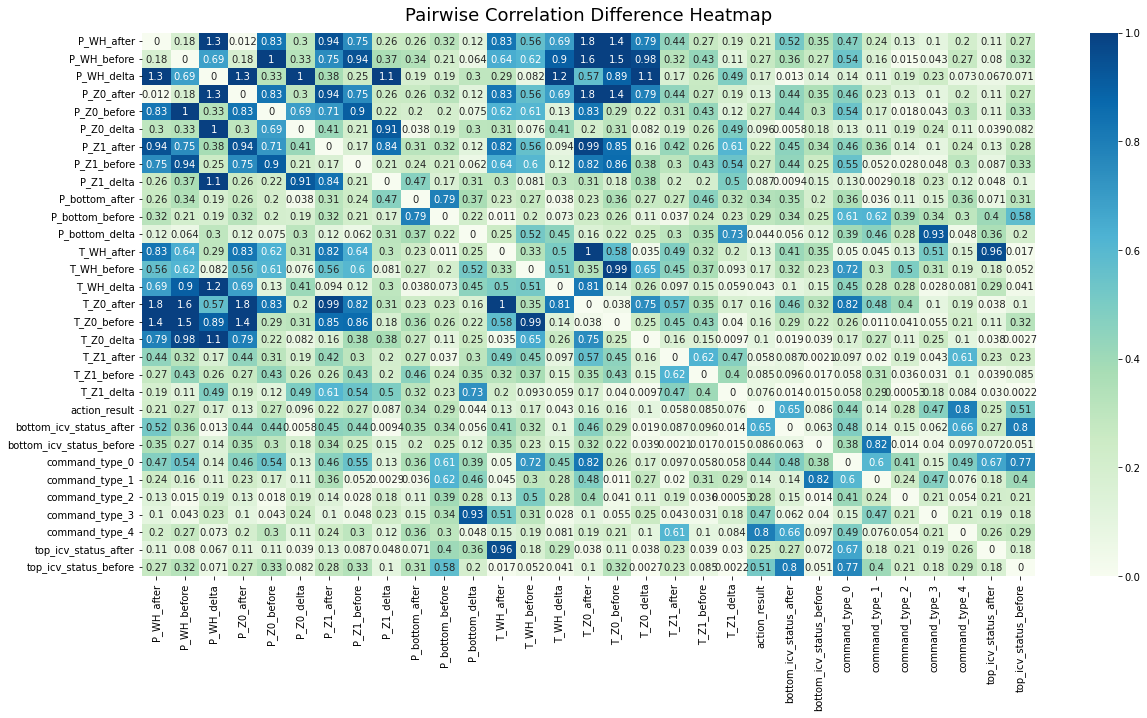

In [9]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(pcd, vmin=0, vmax=1, annot=True, cmap='GnBu')
heatmap.set_title('Pairwise Correlation Difference Heatmap', fontdict={'fontsize':18}, pad=12);

In [10]:
pcd.sum().sort_values(ascending=False)

T_Z0_after                  16.586425
P_WH_after                  14.867756
P_Z0_after                  14.686844
P_WH_before                 14.503608
P_Z1_after                  13.365743
P_WH_delta                  13.265716
T_Z0_before                 13.218115
P_Z0_before                 12.106769
T_WH_after                  11.987980
command_type_0              11.856020
P_Z1_before                 11.750520
T_WH_before                 11.438817
T_WH_delta                   9.379126
T_Z0_delta                   8.882804
P_bottom_before              8.648920
P_Z1_delta                   8.567580
bottom_icv_status_after      8.491930
T_Z1_after                   8.260899
P_Z0_delta                   8.217202
P_bottom_after               8.188802
P_bottom_delta               8.174965
command_type_1               7.631782
T_Z1_before                  7.484588
top_icv_status_before        7.415874
command_type_4               7.175478
action_result                6.990793
T_Z1_delta  

'''
P_Z1                 5.746289
P_Z0                 5.229042
P_WH                 5.227871
action_result        5.008311
T_Z0                 4.977033
T_WH                 4.946675
T_Z1                 4.300884
bottom_icv_status    3.929534
top_icv_status       2.499192
P_bottom             2.363101
delta                2.207578
Type                 1.812296
dtype: float64
'''

## Sweetviz comparison

In [11]:
real = real_data.astype('float64')
synth = synth_data.astype('float64')

In [12]:
real

,P_WH_after,P_WH_before,P_WH_delta,P_Z0_after,P_Z0_before,P_Z0_delta,P_Z1_after,P_Z1_before,P_Z1_delta,P_bottom_after,...,action_result,bottom_icv_status_after,bottom_icv_status_before,command_type_0,command_type_1,command_type_2,command_type_3,command_type_4,top_icv_status_after,top_icv_status_before
0,643.589100,643.608020,0.018920,853.061340,853.080260,0.018920,816.967413,816.986333,0.018920,261.971283,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,643.609483,643.626475,0.016992,853.081724,853.098715,0.016992,816.987796,817.004788,0.016992,261.971283,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,643.626600,643.643800,0.017200,853.098840,853.116040,0.017200,817.004913,817.022113,0.017200,261.020700,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,643.644300,643.659800,0.015500,853.116540,853.132040,0.015500,817.022613,817.038113,0.015500,259.846450,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,643.659800,643.673700,0.013900,853.132040,853.145940,0.013900,817.038113,817.052013,0.013900,259.343200,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,554.930564,552.103200,-2.827364,764.402804,761.575440,-2.827364,728.308877,725.481513,-2.827364,160.589585,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
249,552.084726,551.859215,-0.225511,761.556967,761.331456,-0.225511,725.463039,725.237528,-0.225511,159.595826,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
250,551.821387,551.051082,-0.770305,761.293627,760.523322,-0.770305,725.199699,724.429394,-0.770305,160.179751,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
251,551.021986,556.434525,5.412539,760.494226,765.906765,5.412539,724.400298,729.812838,5.412539,162.942267,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [13]:
synth

,P_WH_after,P_WH_before,P_WH_delta,P_Z0_after,P_Z0_before,P_Z0_delta,P_Z1_after,P_Z1_before,P_Z1_delta,P_bottom_after,...,action_result,bottom_icv_status_after,bottom_icv_status_before,command_type_0,command_type_1,command_type_2,command_type_3,command_type_4,top_icv_status_after,top_icv_status_before
0,782.991774,781.513238,721.997335,732.645404,228.072793,222.739237,88.990443,88.017064,88.256267,91.844784,...,10.648068,-1.478536,-5.333556,-69.947280,1.747713,1.0,0.0,0.0,0.0,0.0
1,823.407968,836.298427,785.214298,786.737540,114.380874,109.468553,85.859813,88.941707,90.356803,87.281548,...,1.523242,12.890459,-4.912321,101.261721,-0.041565,0.0,0.0,0.0,1.0,0.0
2,783.162356,781.606394,727.905276,727.690796,224.554990,230.421390,89.138396,88.773388,89.711909,88.672596,...,-0.214480,-1.555962,5.866400,-0.852047,-1.229892,0.0,0.0,1.0,0.0,0.0
3,782.434641,799.091495,725.812266,725.502688,217.380665,222.701668,88.840552,89.561738,88.047662,87.951192,...,-0.309578,16.656854,5.321003,-75.381007,-3.491265,1.0,0.0,0.0,0.0,0.0
4,845.024456,830.298714,778.727926,791.655508,105.516327,111.314215,85.680819,86.664650,89.330981,86.211135,...,12.927583,-14.725742,5.797888,11.028805,-2.603948,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,787.271113,781.998460,710.195918,716.790706,227.571746,222.070860,88.276114,86.481481,88.353872,88.491776,...,6.594787,-5.272653,-5.500886,-45.014137,-5.753539,0.0,1.0,0.0,0.0,0.0
9996,810.406086,794.551916,752.353625,750.208143,228.402031,224.036259,88.164860,87.298385,88.116074,90.366115,...,-2.145482,-15.854170,-4.365773,37.107424,5.332383,0.0,0.0,0.0,0.0,1.0
9997,787.086793,785.018482,732.677958,722.580568,223.745255,226.726036,89.784324,87.503559,89.757217,89.826107,...,-10.097390,-2.068311,2.980780,-4.265735,-1.839192,1.0,0.0,0.0,0.0,0.0
9998,850.027606,845.226598,774.510375,793.817333,115.348739,110.382150,87.331351,89.311389,84.625393,85.116316,...,19.306958,-4.801008,-4.966590,-101.104098,-1.986409,1.0,0.0,0.0,0.0,0.0


In [14]:
real.columns

Index(['P_WH_after', 'P_WH_before', 'P_WH_delta', 'P_Z0_after', 'P_Z0_before',
       'P_Z0_delta', 'P_Z1_after', 'P_Z1_before', 'P_Z1_delta',
       'P_bottom_after', 'P_bottom_before', 'P_bottom_delta', 'T_WH_after',
       'T_WH_before', 'T_WH_delta', 'T_Z0_after', 'T_Z0_before', 'T_Z0_delta',
       'T_Z1_after', 'T_Z1_before', 'T_Z1_delta', 'action_result',
       'bottom_icv_status_after', 'bottom_icv_status_before', 'command_type_0',
       'command_type_1', 'command_type_2', 'command_type_3', 'command_type_4',
       'top_icv_status_after', 'top_icv_status_before'],
      dtype='object')

In [15]:
feature_config = sv.FeatureConfig(force_num=['P_WH_after', 'P_WH_before', 'P_WH_delta', 'P_Z0_after', 'P_Z0_before',
       'P_Z0_delta', 'P_Z1_after', 'P_Z1_before', 'P_Z1_delta',
       'P_bottom_after', 'P_bottom_before', 'P_bottom_delta', 'T_WH_after',
       'T_WH_before', 'T_WH_delta', 'T_Z0_after', 'T_Z0_before', 'T_Z0_delta',
       'T_Z1_after', 'T_Z1_before', 'T_Z1_delta'], skip=['action_result',
       'bottom_icv_status_after', 'bottom_icv_status_before', 'command_type_0',
       'command_type_1', 'command_type_2', 'command_type_3', 'command_type_4',
       'top_icv_status_after', 'top_icv_status_before'])

In [16]:
my_report = sv.compare([synth, "Synthetic Data"], [real, "Real Data"], feat_cfg=feature_config)

                                             |                                             | [  0%]   00:00 ->…

In [17]:
my_report.show_html(filepath='Synth_vs_Real_REPORT.html')

Report Synth_vs_Real_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## EXPLORATORY DATA ANALYSIS OF THE SYNTHETIC DATASET PRODUCED VERSUS ITS REAL CORRESPONDING MEASURED VARIABLES

In [42]:
def summarize(data):
    data_info = []
    for col in data.columns:
        data_info.append([col,
                          data[col].count(),
                          data[col].isna().sum(),
                          data[col].nunique(),
                          np.count_nonzero(data[col] == 0),
                          data[col].max(),
                          data[col].quantile(0.75),
                          data[col].mean(),
                          data[col].median(),
                          data[col].quantile(0.25),
                          data[col].min(),
                          data[col].max() - data[col].min(),
                          iqr(data[col]),
                          data[col].std(),
                          data[col].kurtosis(),
                          data[col].skew()
                         ])
    columns = ['Variable', 'Num Obs', 'Num Missing', 'Num Unique', 'Num Zeroes', 'Max', 'Q3', 'Avg', 'Median', 'Q1', 'Min', 'Range', 'IQR', 'STD', 'Kurtosis', 'Skewness']
    return pd.DataFrame(data_info, columns=columns)

real_info = summarize(real)
synth_info = summarize(synth)

# print summary report
print("-" * 80)
print("{:<30s}{:<15s}{:<15s}".format("", "Real Data", "Synthetic Data"))
print("-" * 80)

for index, row in real_info.iterrows():
    print("-" * 80)
    print("{:<30s}".format("Variable: " + row['Variable']))
    print("-" * 55)
    print("{:<30s}{:<15d}{:<15d}".format("Number of observations:", row['Num Obs'], synth_info.iloc[index]['Num Obs']))
    print("{:<30s}{:<15d}{:<15d}".format("Number of missing values:", row['Num Missing'], synth_info.iloc[index]['Num Missing']))
    print("{:<30s}{:<15d}{:<15d}".format("Number of distinct values:", row['Num Unique'], synth_info.iloc[index]['Num Unique']))
    print("{:<30s}{:<15d}{:<15d}".format("Number of zeroes:", row['Num Zeroes'], synth_info.iloc[index]['Num Zeroes']))
    print("-" * 55)
    print("{:<30s}{:<15.2f}{:<15.2f}".format("Max value:", row['Max'], synth_info.iloc[index]['Max']))
    print("{:<30s}{:<15.2f}{:<15.2f}".format("Q3:", row['Q3'], synth_info.iloc[index]['Q3']))
    print("{:<30s}{:<15.2f}{:<15.2f}".format("Avg:", row['Avg'], synth_info.iloc[index]['Avg']))
    print("{:<30s}{:<15.2f}{:<15.2f}".format("Median:", row['Median'], synth_info.iloc[index]['Median']))
    print("{:<30s}{:<15.2f}{:<15.2f}".format("Q1:", row['Q1'], synth_info.iloc[index]['Q1']))
    print("{:<30s}{:<15.2f}{:<15.2f}".format("Min value:", row['Min'], synth_info.iloc[index]['Min']))
    print("-" * 55)
    print("{:<30s}{:<15.2f}{:<15.2f}".format("Range:", row['Range'], synth_info.iloc[index]['Range']))
    print("{:<30s}{:<15.2f}{:<15.2f}".format("IQR:", row['IQR'], synth_info.iloc[index]['IQR']))
    print("{:<30s}{:<15.2f}{:<15.2f}".format("STD:", row['STD'], synth_info.iloc[index]['STD']))
    print("{:<30s}{:<15.2f}{:<15.2f}".format("Kurtosis:", row['Kurtosis'], synth_info.iloc[index]['Kurtosis']))
    print("{:<30s}{:<15.2f}{:<15.2f}".format("Skewness:", row['Skewness'], synth_info.iloc[index]['Skewness']))

--------------------------------------------------------------------------------
                              Real Data      Synthetic Data 
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Variable: P_WH_after          
-------------------------------------------------------
Number of observations:       235            10000          
Number of missing values:     0              0              
Number of distinct values:    235            10000          
Number of zeroes:             0              0              
-------------------------------------------------------
Max value:                    643.70         864.29         
Q3:                           633.36         833.11         
Avg:                          602.57         795.78         
Median:                       596.00         791.05         
Q1:                           585.18         782.57         
Min 

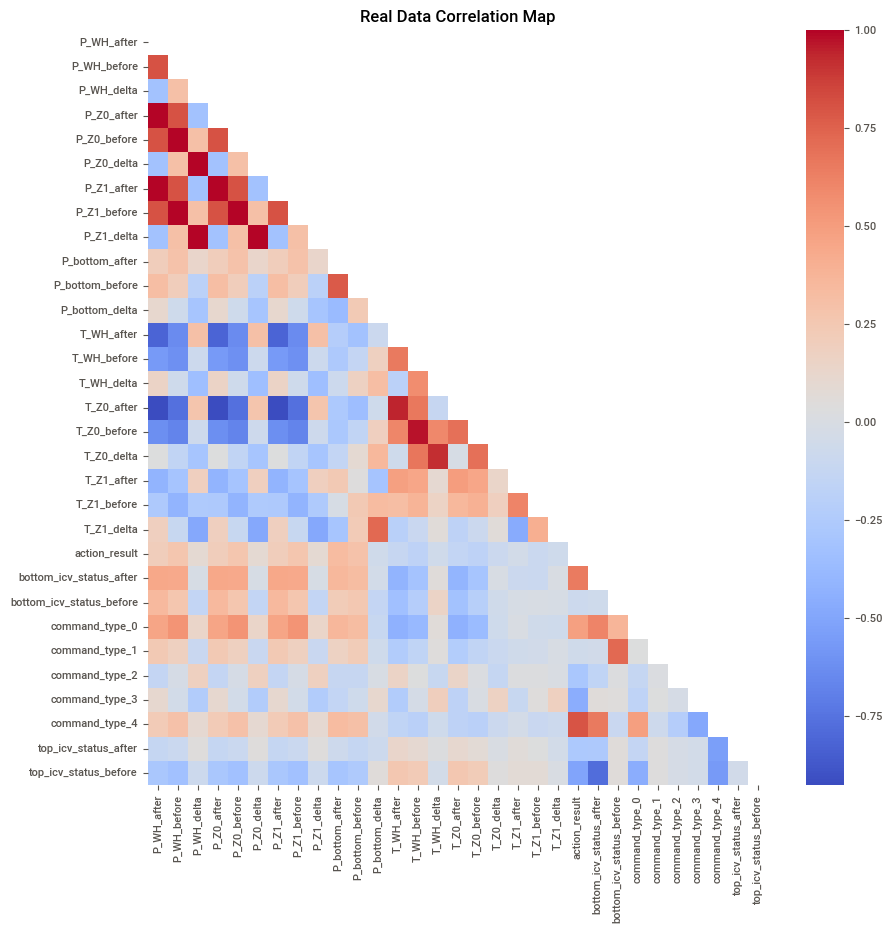

In [50]:
real_data_corr_map = sns.color_palette("coolwarm", as_cmap=True)
synthetic_data_corr_map = sns.color_palette("coolwarm", as_cmap=True)

# Plot only the bottom half of the correlation matrix
mask = np.zeros_like(real_data.corr())
mask[np.triu_indices_from(mask)] = True

# Plot the correlation maps
plt.figure(figsize=(10, 10))
sns.heatmap(real.corr(), cmap=real_data_corr_map, mask=mask, annot=False)
plt.title('Real Data Correlation Map')
plt.savefig('real_data_corr_map.png')
plt.show()

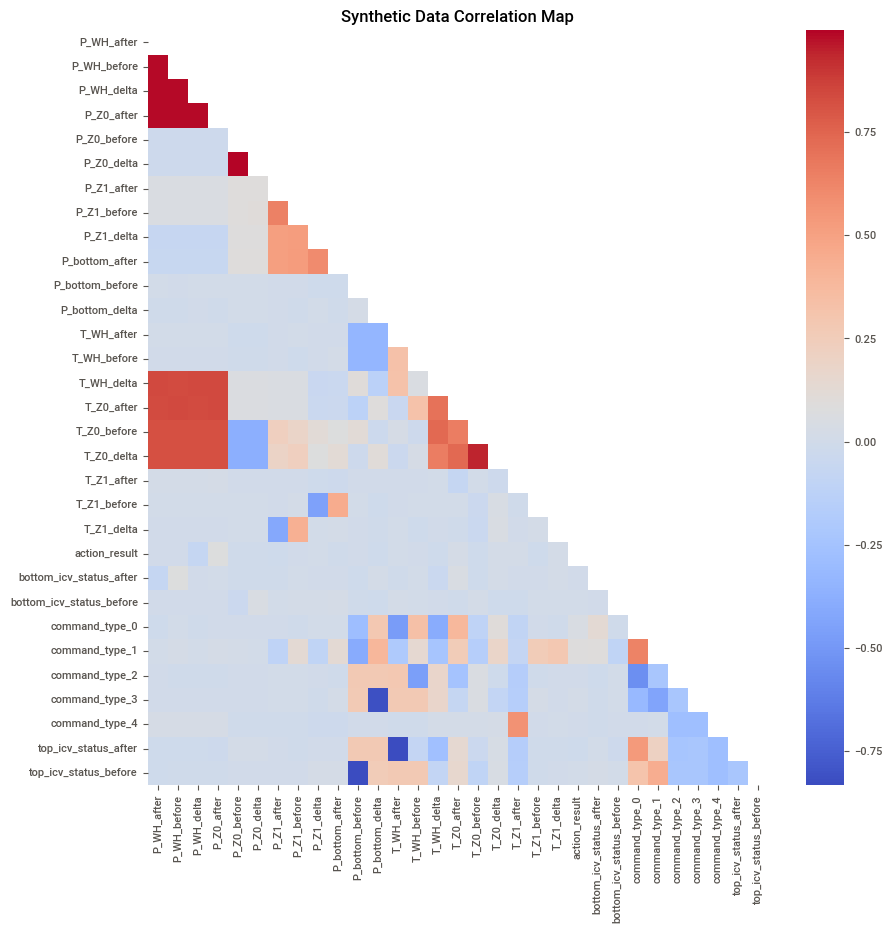

In [51]:
plt.figure(figsize=(10, 10))
sns.heatmap(synth.corr(), cmap=synthetic_data_corr_map, mask=mask, annot=False)
plt.title('Synthetic Data Correlation Map')
plt.savefig('synthetic_data_corr_map.png')
plt.show()

In [56]:
import math

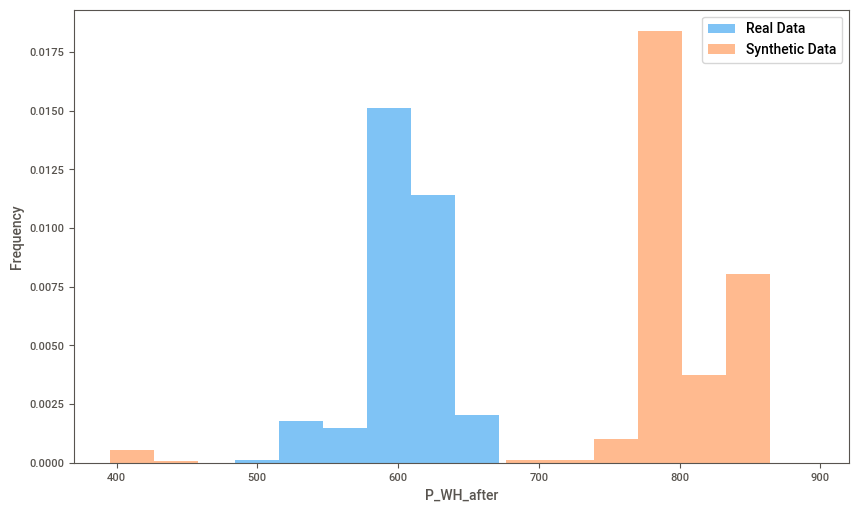

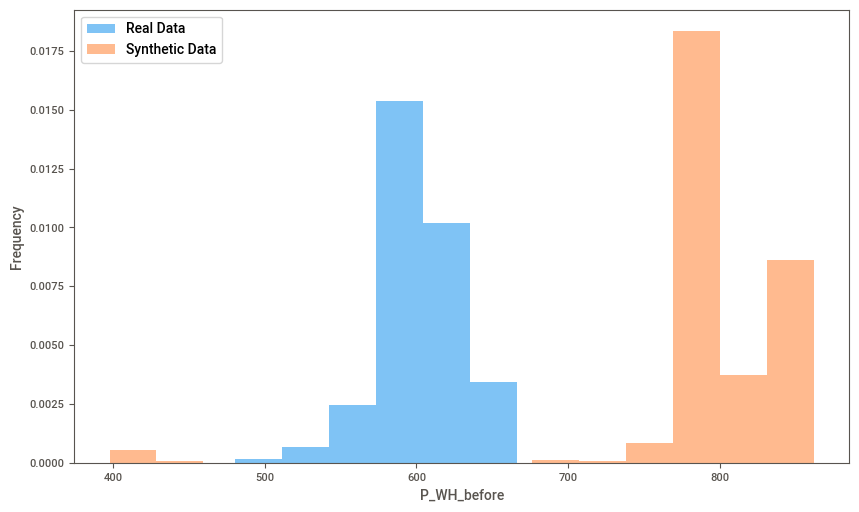

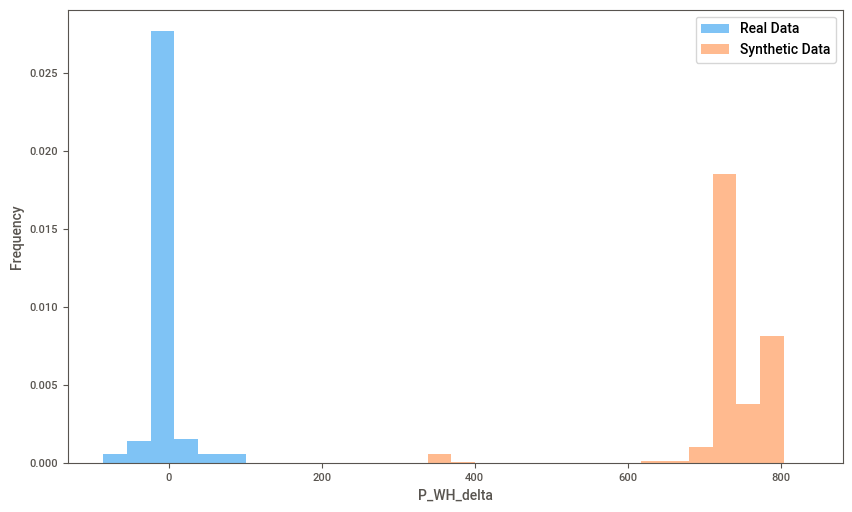

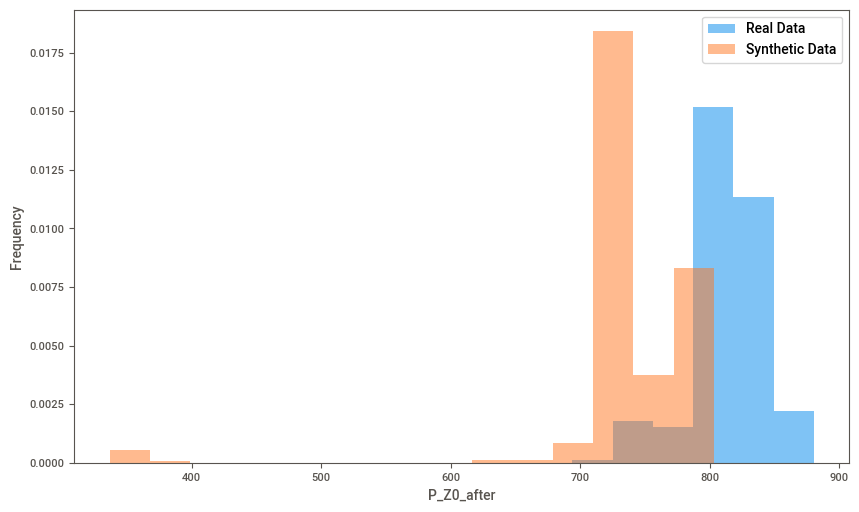

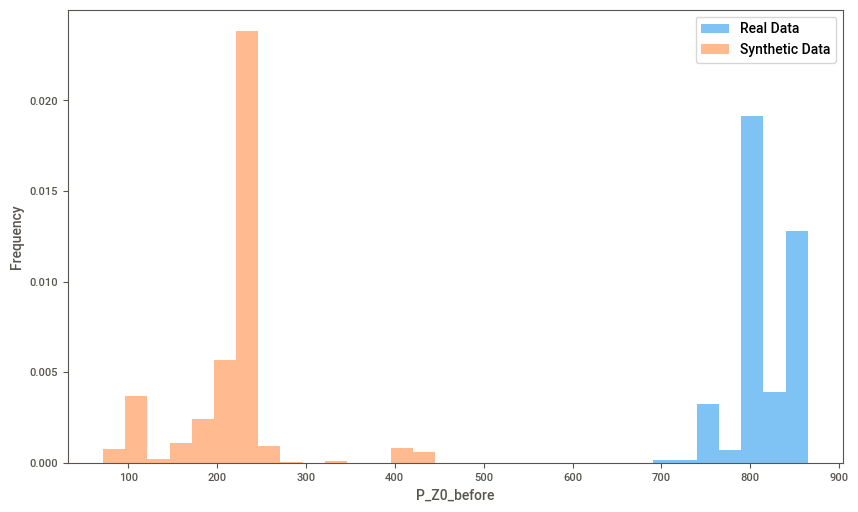

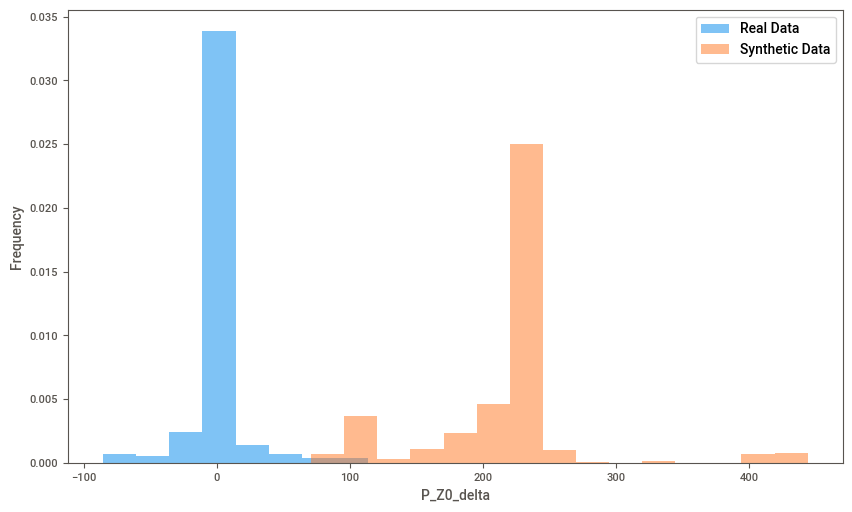

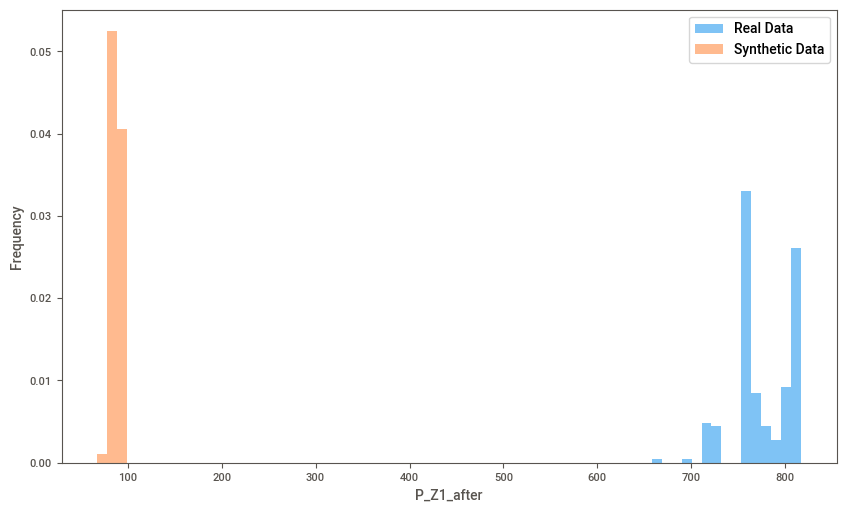

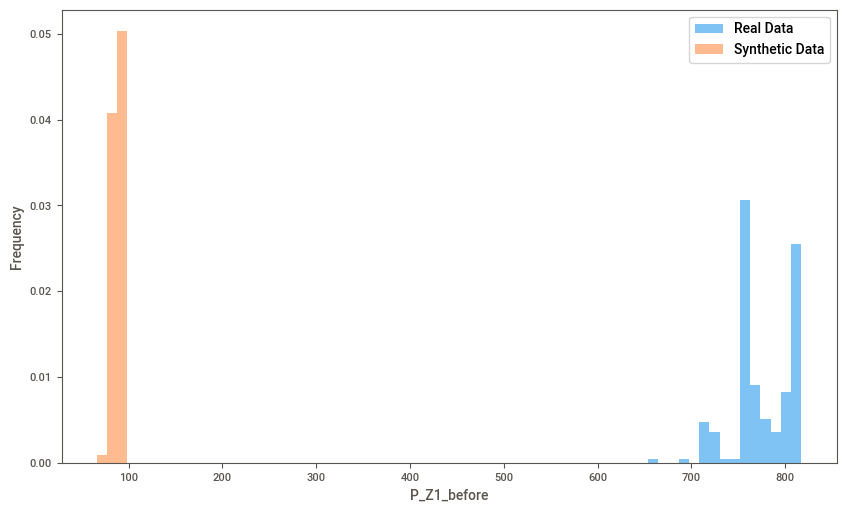

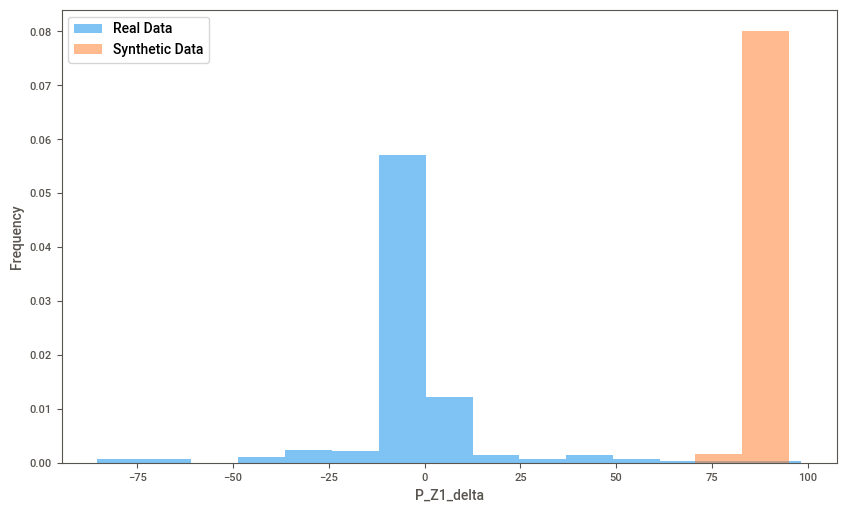

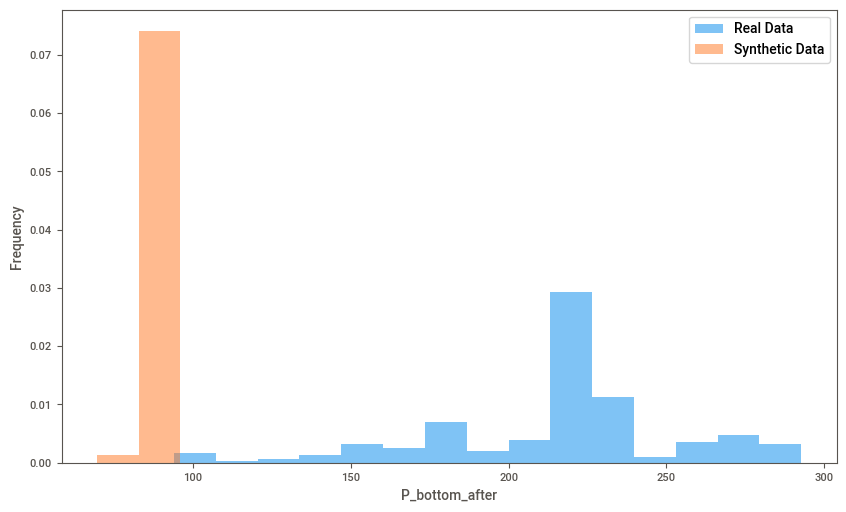

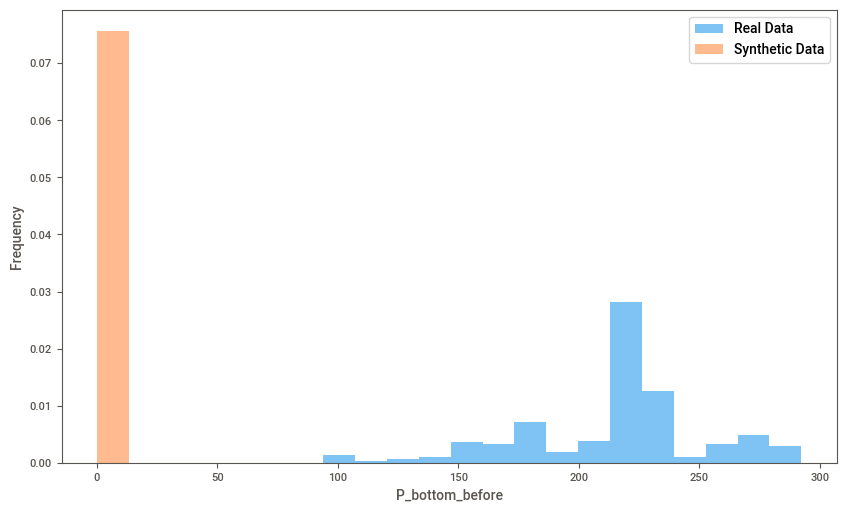

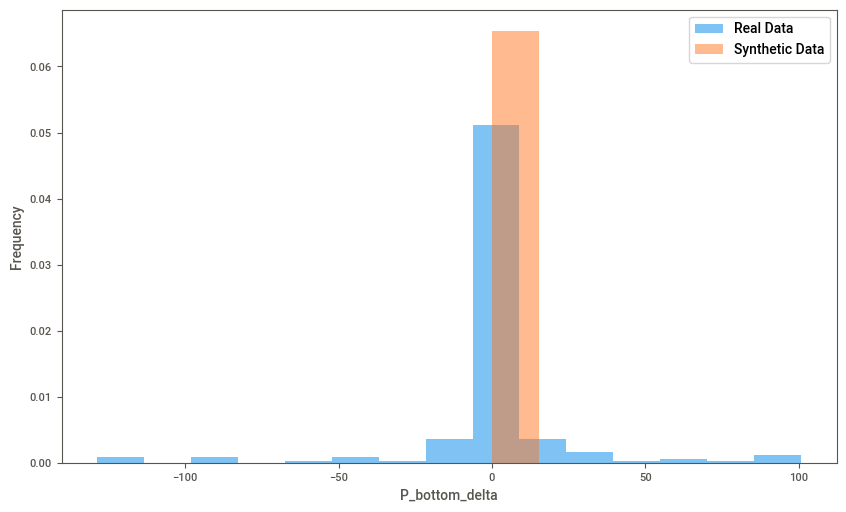

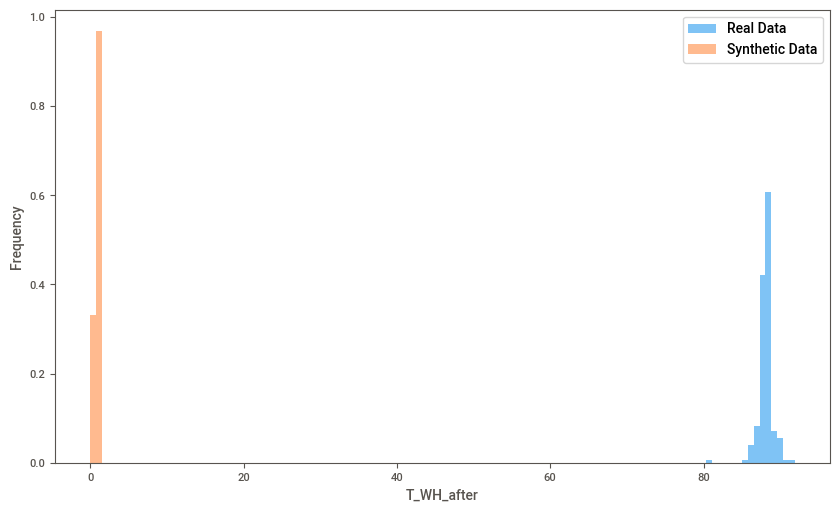

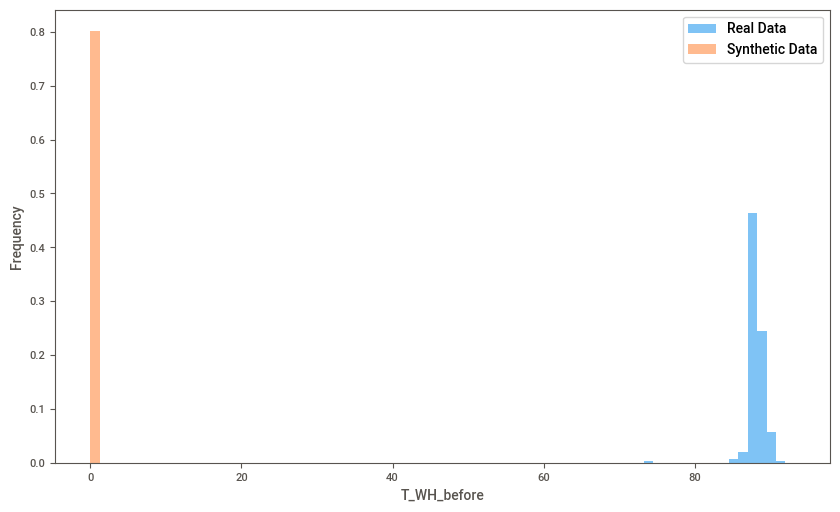

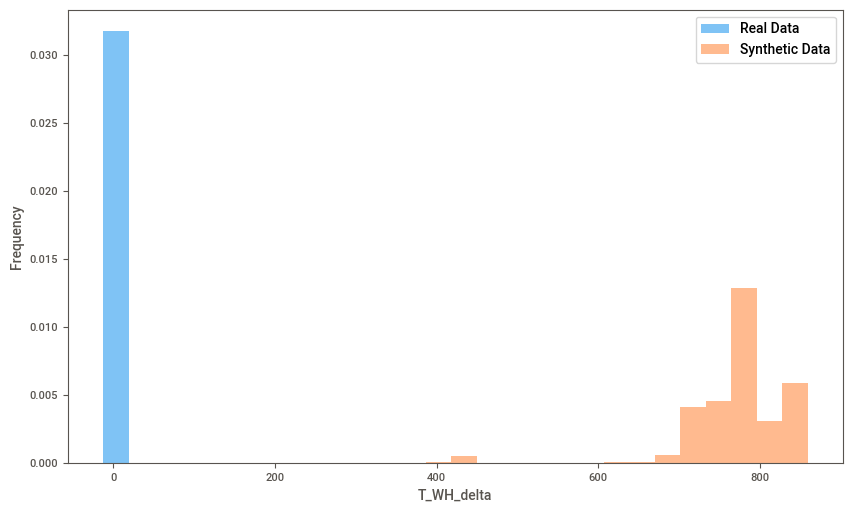

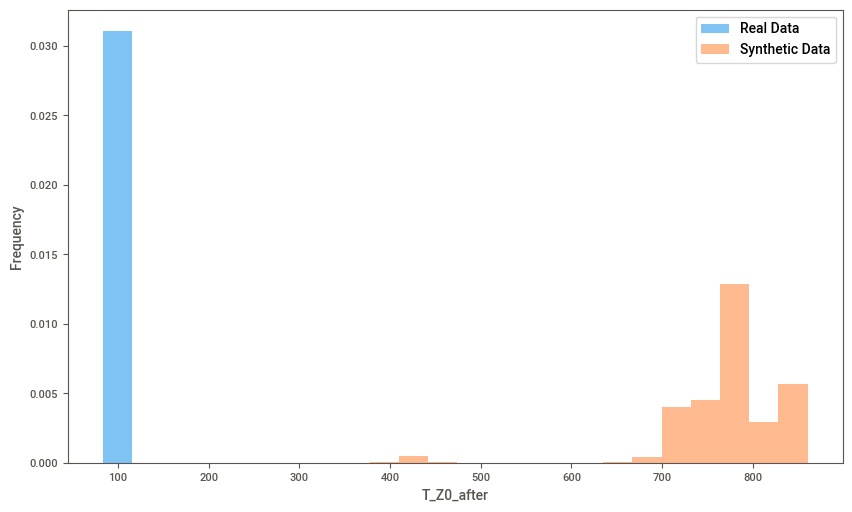

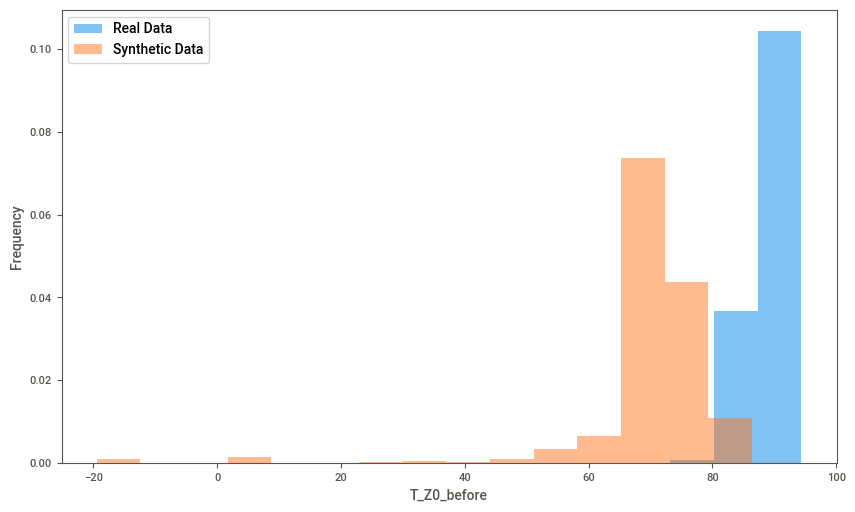

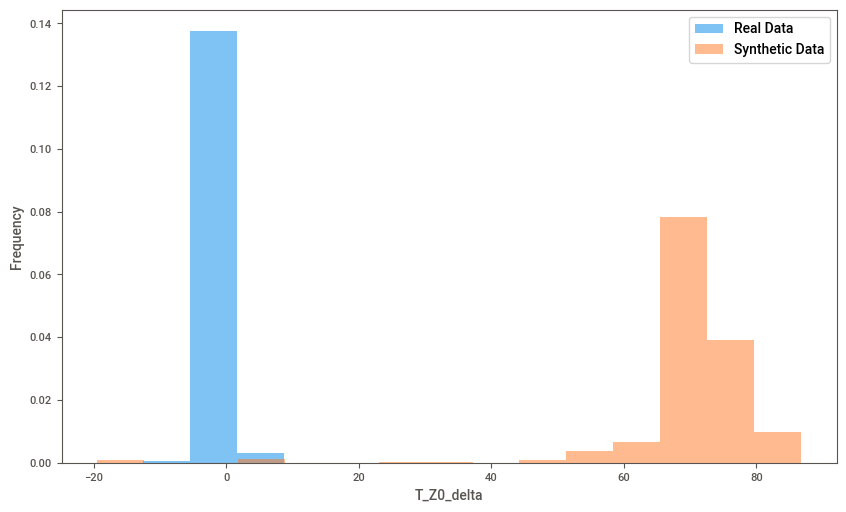

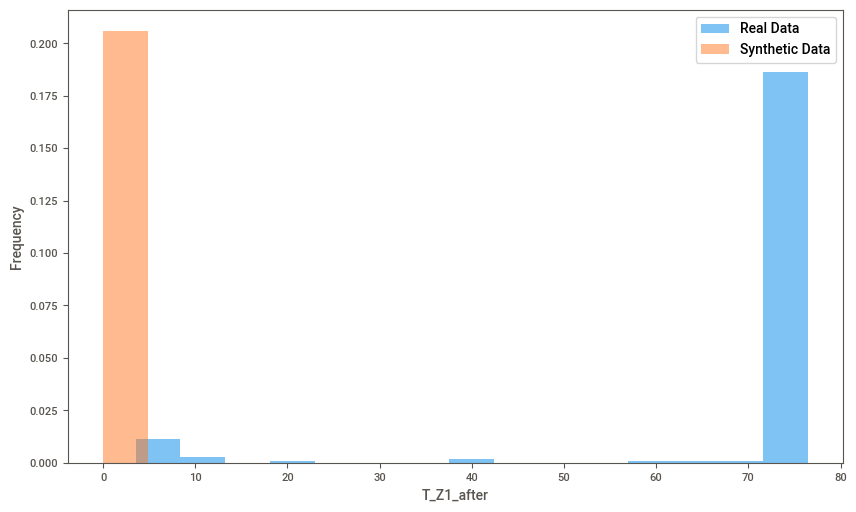

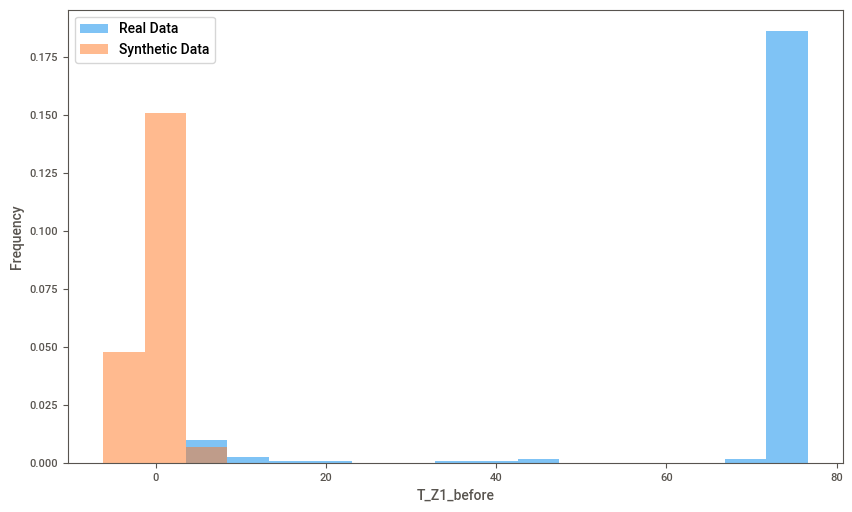

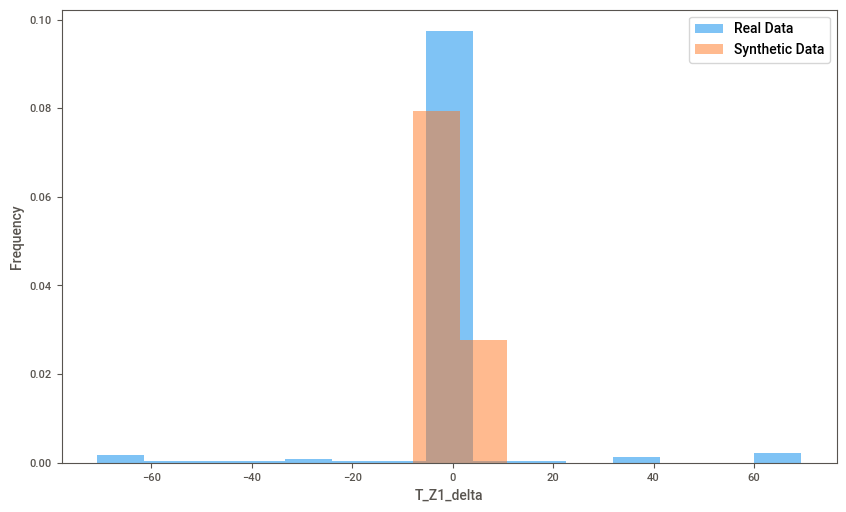

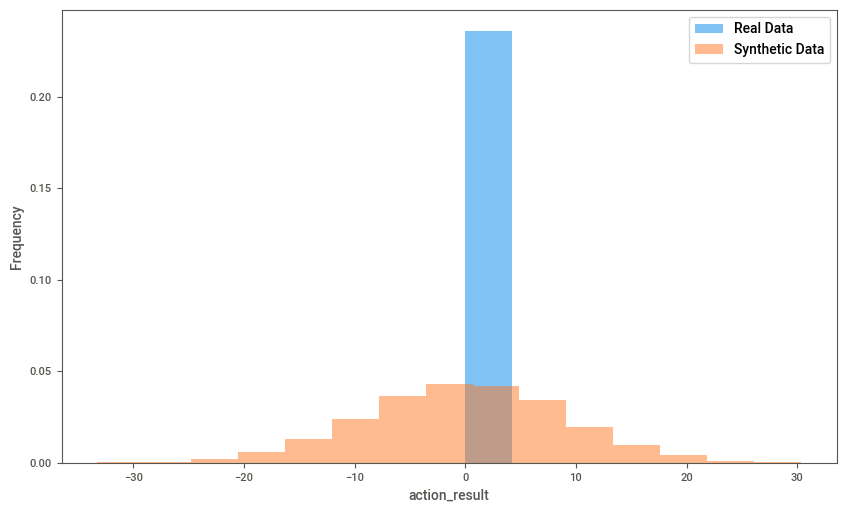

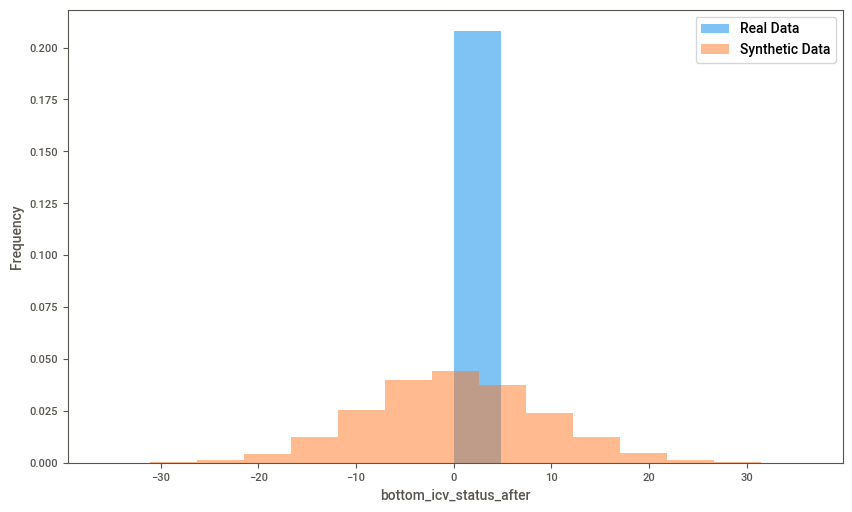

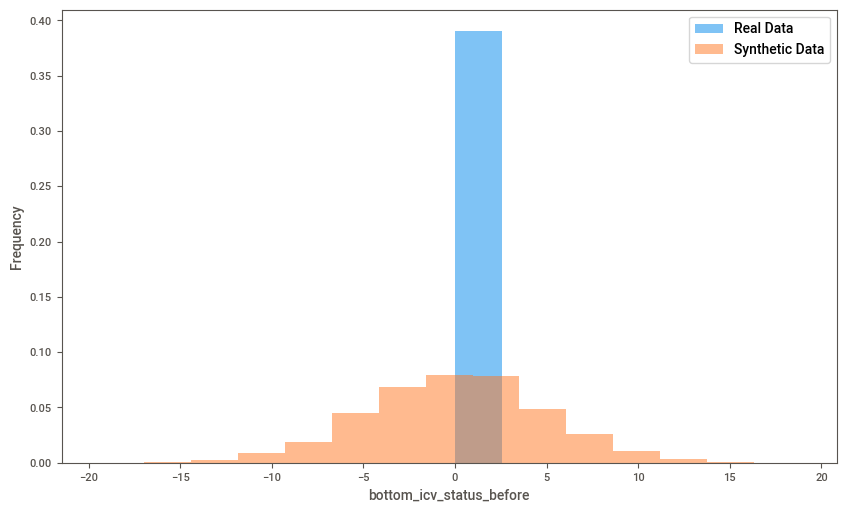

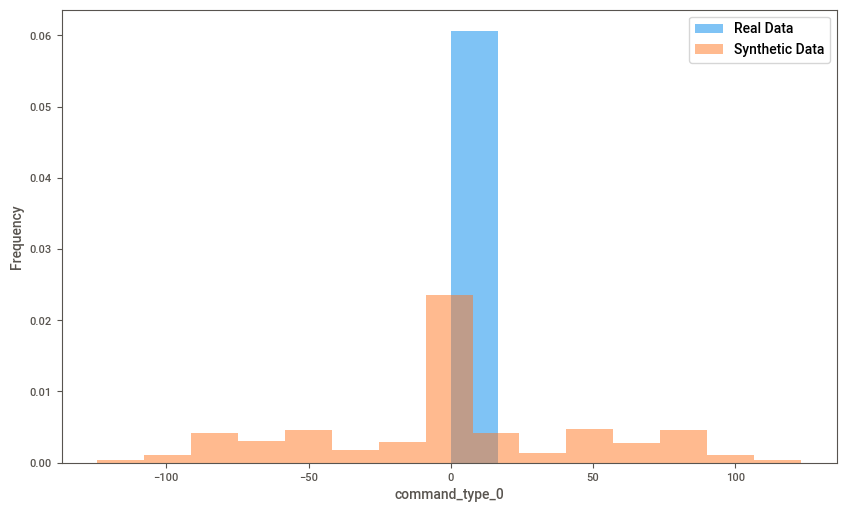

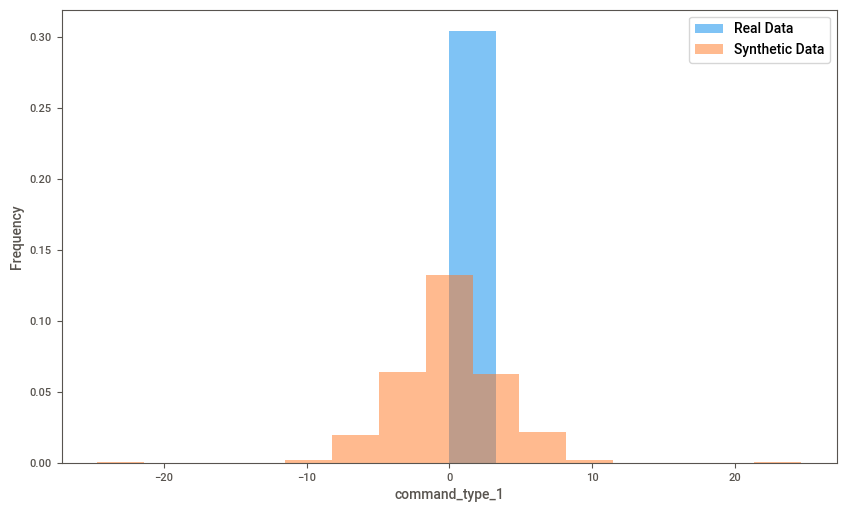

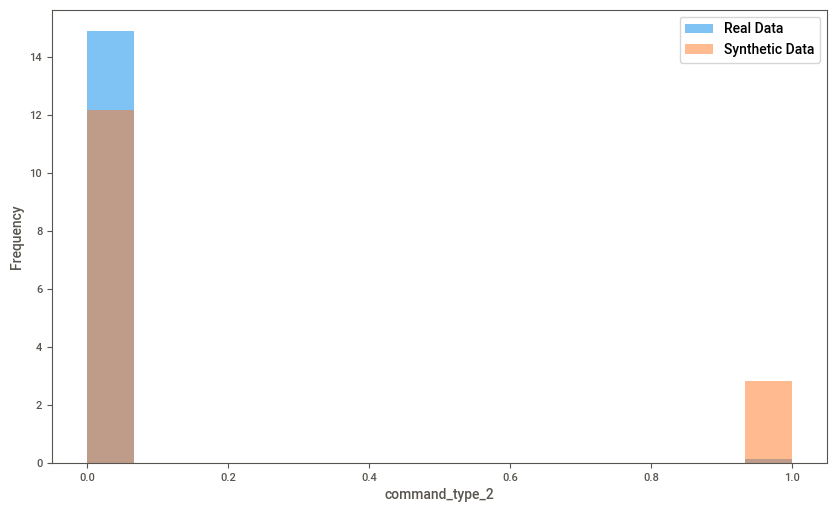

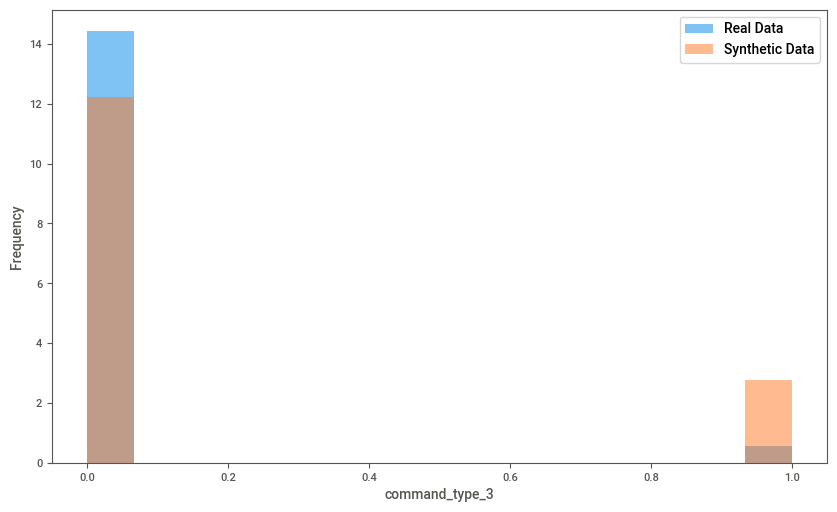

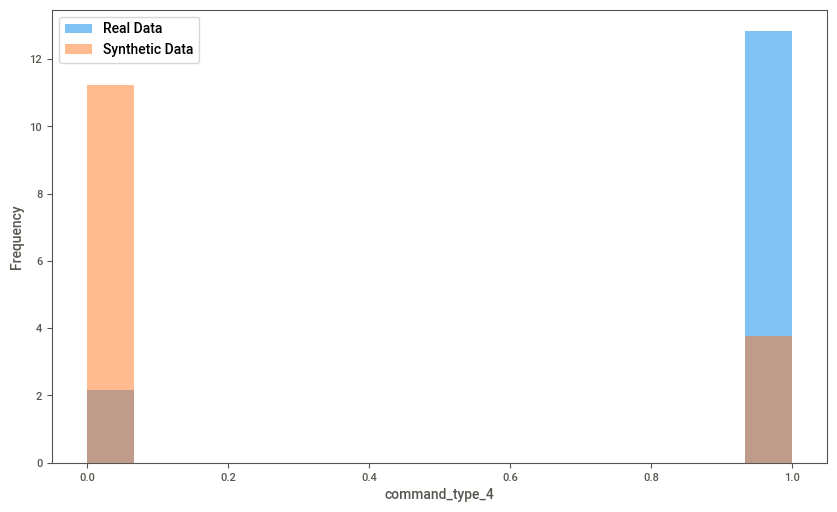

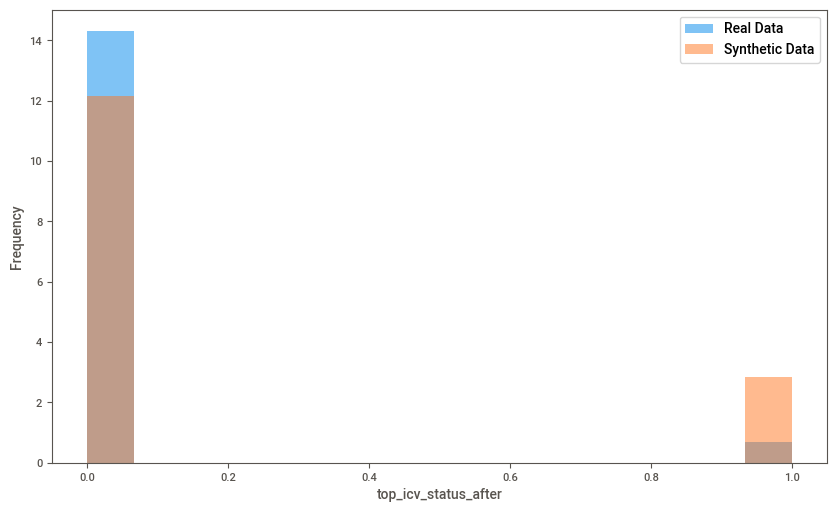

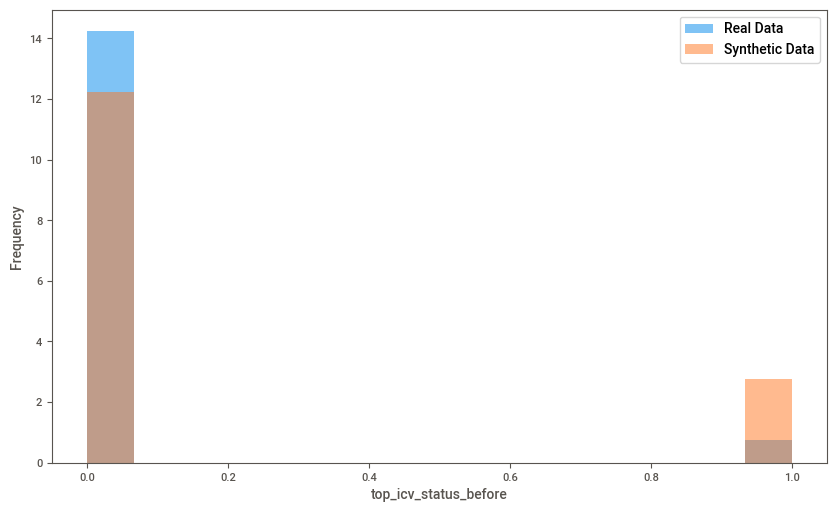

In [58]:
# Set color palette for the histograms
palette = sns.color_palette(['orange', 'blue'])

# Create histograms for each variable
for col in real.columns:
    # Determine the bin width based on the wider range of the two datasets
    bin_width = max(real[col].max() - real[col].min(), synth[col].max() - synth[col].min()) / 15
    
    # Plot the histograms
    plt.figure(figsize=(10,6))
    plt.hist(real[col], bins=np.arange(real[col].min(), real[col].max() + bin_width, bin_width), alpha=0.5, label='Real Data', density=True)
    plt.hist(synth[col], bins=np.arange(synth[col].min(), synth[col].max() + bin_width, bin_width), alpha=0.5, label='Synthetic Data', density=True)
    
    # Set plot labels and legend
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    
    # Save plot
    plt.savefig(f'{col}_real_synth_hist.png')
    plt.show()